# Baseline Model Comparison

### Setup

In [1]:
import os
os.getcwd()

'd:\\ironhack_bootcamp\\main-bootcamp\\week5\\mini-ironack-project\\ml-house-price-predictions\\notebook'

In [2]:
os.chdir('D:\ironhack_bootcamp\main-bootcamp\week5\mini-ironack-project\ml-house-price-predictions')

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\harma\AppData\Local\Temp\ipykernel_18036\425988057.py:1: SyntaxWarning: invalid escape sequence '\i'
  os.chdir('D:\ironhack_bootcamp\main-bootcamp\week5\mini-ironack-project\ml-house-price-predictions')


### Import Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# import custom functions
from utils.common_util import *
from utils.plot_results import *

### Load Data

In [4]:
from src.data_loader import DataLoader
path = r"dataset\raw-dataset\king_ country_ houses_aa.csv"
data_loader =DataLoader(path)

# Load dataset
data = data_loader.csv_load_dataset()

df = data.copy()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Column Preprocessing

In [5]:
get_lowercase(df)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='str')

In [6]:
get_target_col_last(df)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


## Data Overview

In [7]:
df.shape

(21613, 21)

In [8]:
df.dtypes

id                 int64
date                 str
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
dtype: object

### Duplicate records

In [9]:
def duplicate_records(datafame):
    duplicate_count = datafame.duplicated().sum()

    if duplicate_count == 0:
        print(f"No duplicate records found: {duplicate_count}")
    else:
        print(f"The dataset has duplicate records: {duplicate_count}")

duplicate_records(df)

No duplicate records found: 0


### Missing values

In [10]:
def missing_values(dataframe):
    missing_count = dataframe.isna().sum()
    total_missing_count = missing_count.sum()

    if total_missing_count == 0:
        print(f"No missing values found in the dataset.")
    else:
        print(f"Missing values found in the dataset.")
        return  missing_count
missing_values(df)

No missing values found in the dataset.


In [11]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,4.580302e+09,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.400881e+05
std,2.876566e+09,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.671272e+05
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,2.123049e+09,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


Question: What can we remove from dataset for first baseline model?
- Since we checked our data already cleaned, having no missing and duplicate values. So this does not require instense cleaning.

- However, the ``id`` and ``date`` column we can drop.



After baseline model
- Column ``bedrooms`` has max value of 33 Bedrooms. But  75% of the data has lies with 4 number of rooms.

- Treat columns  ``zipcode``, ``lat`` and ``long``. 

## Baseline Model Comparison

In [12]:
df_baseline = df.drop(columns=['date', 'id'])
df_baseline.to_csv("dataset/processed-dataset/baseline_dataset.csv", sep=',', index= False)
df_baseline.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


#### Split Dataset

In [13]:
X_train, X_test, y_train, y_test = split_dataset(df_baseline, 'price')

Random State: 42
Test size: 20.0%

X_train: (17290, 18)
X_test : (4323, 18)
y_train: (17290,)
y_test : (4323,)


#### Model Comparision

In [16]:
from utils.compare_models import *
lr = LinearRegression()
single_model_results(X_train, y_train, X_test, y_test, model=lr)

Model Evaluation - LinearRegression()

R2 Score
Train: 0.6991
Test : 0.7012

MAE
Train: 125033.1649
Test : 127493.3421

Overfit Gap
Gap: 0.21%


In [18]:
baseline_results= compare_multiple_models(X_train, y_train, X_test, y_test, steps='baseline').sort_index()
baseline_results.to_csv("results/baseline_results.csv", index= False, sep=",")
baseline_results

,model_name,data_steps,r2_train,r2_test,mae_train,mae_test,overfit_gap
0,Linear Regression,baseline,0.6991,0.7012,125033.16,127493.34,-0.21
1,Ridge Regression,baseline,0.6991,0.7011,125014.97,127487.59,-0.20
2,Lasso Regression,baseline,0.6991,0.7012,125032.19,127492.90,-0.21
3,KNN Regressor,baseline,0.6765,0.5037,126347.00,164930.90,17.29
4,Decision Tree,baseline,0.9992,0.7155,941.90,103938.00,28.38
5,Random Forest,baseline,0.9819,0.8596,25999.91,72423.70,12.23
6,XGBoost,baseline,0.8408,0.7540,89693.66,101475.16,8.68


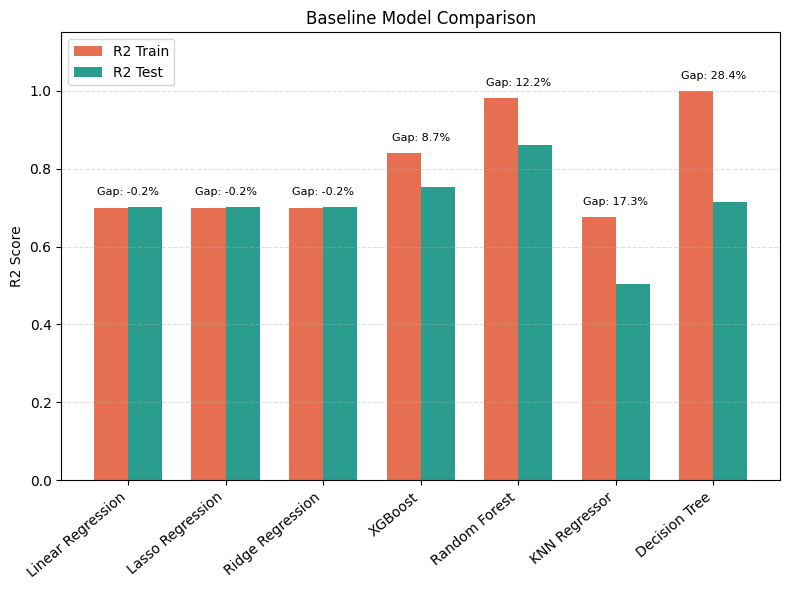

In [19]:
from utils.plot_results import plot_results
plot_results(baseline_results, 'baseline')

**Interpretation**

* The linear models (Linear, Ridge, Lasso) show almost the same train and test R² scores. This means they are stable and not overfitting, but their performance is moderate.

* Random Forest and XGBoost perform better than linear models. Random Forest has the highest test R², but it shows some overfitting compared to its train score.

* Decision Tree has very high train R² but much lower test R². This indicates strong overfitting, meaning it memorizes the training data but does not generalize well.


----

## Scaling Dataset 
- We implement the scaling on the dataset that we have used to train the baseline model.

- After scaling we train the model again on the scaled dataset and observe any changes in model performance. 

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scaled X_train
X_train_scaled = scaler.fit_transform(X_train)
# Scaled X_test
X_test_scaled = scaler.transform(X_test)

### Scaled Model Comparision

In [22]:
baseline_scaled_results= compare_multiple_models(X_train_scaled, y_train, X_test_scaled, y_test, steps='baseline-scaled').sort_index()
baseline_scaled_results.to_csv("results/baseline_scaled_results.csv", index= False, sep=",")
baseline_scaled_results.head()

,model_name,data_steps,r2_train,r2_test,mae_train,mae_test,overfit_gap
0,Linear Regression,baseline-scaled,0.6991,0.7012,125033.16,127493.34,-0.21
1,Ridge Regression,baseline-scaled,0.6991,0.7012,125030.99,127491.40,-0.21
2,Lasso Regression,baseline-scaled,0.6991,0.7012,125033.10,127493.33,-0.21
3,KNN Regressor,baseline-scaled,0.8693,0.7798,70833.83,93156.44,8.95
4,Decision Tree,baseline-scaled,0.9992,0.7201,941.90,103509.79,27.91


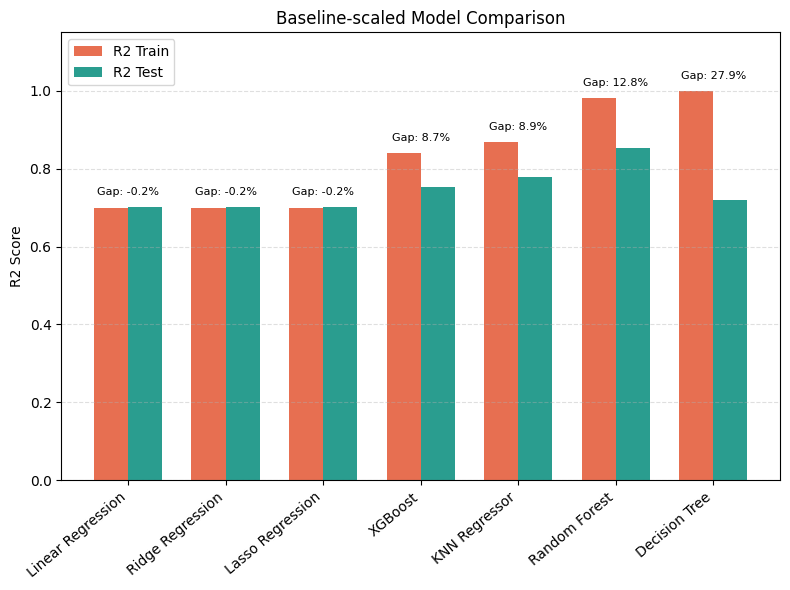

In [23]:
plot_results(baseline_scaled_results, 'baseline-scaled')

### Compare Baseline Vs Scaled Baseline

In [24]:
df1= pd.read_csv(r"results\baseline_results.csv")
df2 = pd.read_csv(r"results\baseline_scaled_results.csv")
df_combined = pd.concat([df1, df2], axis= 0).reset_index(drop='index')
df_combined

,model_name,data_steps,r2_train,r2_test,mae_train,mae_test,overfit_gap
0,Linear Regression,baseline,0.6991,0.7012,125033.16,127493.34,-0.21
1,Ridge Regression,baseline,0.6991,0.7011,125014.97,127487.59,-0.20
2,Lasso Regression,baseline,0.6991,0.7012,125032.19,127492.90,-0.21
3,KNN Regressor,baseline,0.6765,0.5037,126347.00,164930.90,17.29
4,Decision Tree,baseline,0.9992,0.7155,941.90,103938.00,28.38
5,Random Forest,baseline,0.9819,0.8596,25999.91,72423.70,12.23
6,XGBoost,baseline,0.8408,0.7540,89693.66,101475.16,8.68
7,Linear Regression,baseline-scaled,0.6991,0.7012,125033.16,127493.34,-0.21
8,Ridge Regression,baseline-scaled,0.6991,0.7012,125030.99,127491.40,-0.21
9,Lasso Regression,baseline-scaled,0.6991,0.7012,125033.10,127493.33,-0.21


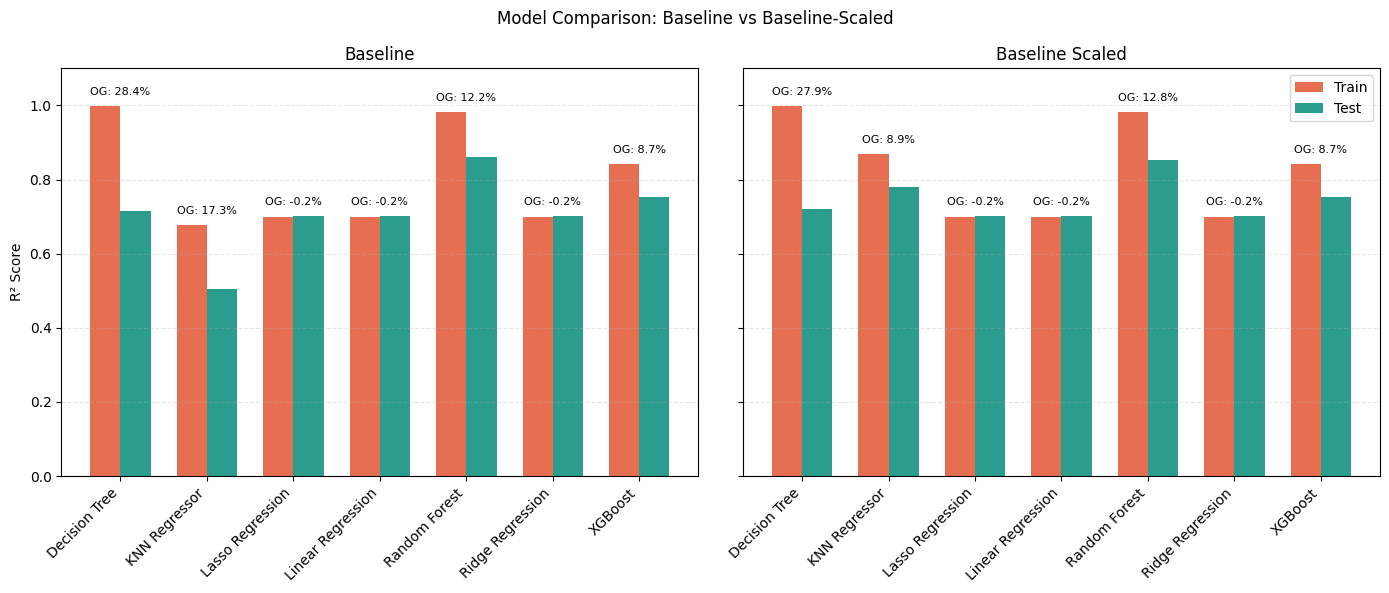

In [25]:
scale_unscale_model_comparison(df1, df2)

**Interpretation**

The linear models (Linear, Ridge, Lasso) perform almost the same in both baseline and scaled versions. Their train and test R² are very close, which shows they are stable and not overfitting, but their performance is moderate.

KNN improves a lot after scaling. Its test R² increases significantly and the overfit gap becomes much smaller, showing that KNN benefits strongly from feature scaling.

Decision Tree and Random Forest achieve high train scores, but Decision Tree shows very high overfitting. Random Forest performs much better on test data and remains the strongest overall model, especially in the scaled version.

----

In [ ]:
df1 = df_baseline.copy()

In [ ]:
df1.describe()

#### Handle Invalid Values


##### bedrooms

In [ ]:
df1.bedrooms.describe()

In [ ]:
np.sort(df1.bedrooms.unique())

In [ ]:
df1[df1.bedrooms==0].value_counts().sum()

In [ ]:
df1[df['bedrooms'] == 0][['sqft_living', 'price']].sort_values(by='sqft_living')

- There are 13 houses where the number of bedrooms is recorded as 0.

- The typical (median) number of bedrooms in the dataset is 3.

- We could replace 0 with 3, but that would not be correct.

- A very small house (like 290 sqft) could be a studio with no separate bedroom.

- But a very large house (like 4810 sqft) cannot realistically have 0 bedrooms.

- If we change all of them to 3 bedrooms, we create unrealistic data.

- This would add incorrect information and affect the model.

- So, it is better to remove these 13 records instead of filling them.

In [ ]:
df1 = df1[df1.bedrooms>0]
df = df[df.bedrooms>0]
print(df[df.bedrooms==0].value_counts().sum())

In [ ]:
df1.shape

In [ ]:
df.shape

In [ ]:
df.head()

##### bathrooms

- Similarly we can check the values for bathrooms and we can decide should we impute the values or drop the values.

In [ ]:
df1.describe()

In [ ]:
df1[df1.bathrooms==0]

In [ ]:
# Since these are only 3 records.
# So we can drop these records.

df1 = df1[df1['bathrooms'] > 0]
df = df[df['bathrooms'] > 0]
print(df[df.bathrooms==0].value_counts().sum())

In [ ]:
df.bathrooms.unique()

##### Zipcode



In [ ]:
print(df1.zipcode.dtypes, df.zipcode.nunique())
print(df1.zipcode.unique())

In [ ]:
df1.head()

In [ ]:
df1.shape

In [ ]:
zip_price_mean = df1.groupby('zipcode')['price'].mean().round(2).sort_index()
zip_price_mean

# This confirms that zip code has influence of pricing.
# Treating it as numeric would make the model assume.
# Model can learn that higher zipcode means higher price (which is incorrect logic).

In [ ]:
# We can change the data type from int to category
# Category types make it store in discrete groups  
df1.zipcode = df1.zipcode.astype('category')
df1.zipcode.dtypes

In [ ]:
df.zipcode = df.zipcode.astype('category')
df.zipcode.dtypes

In [ ]:
df_dummies = pd.get_dummies(df, columns=['zipcode'], drop_first=True)
df_dummies.shape

In [ ]:
df_dummies.drop(columns='date', inplace = True)

In [ ]:
df_dummies.head()

In [ ]:
df_dummies.sample()

#### Spilt Dataset

In [ ]:
X_train, X_test, y_train, y_test = split_dataset(df_dummies, 'price')

#### Train Model

In [ ]:
# Fit model with scaled dataset
lr_removed_invalid_values = lr.fit(X_train, y_train)

# Predictions
y_pred_train_invalid = lr_removed_invalid_values.predict(X_train)
y_pred_test_invalid = lr_removed_invalid_values.predict(X_test)

#### Model Evaluation

In [ ]:
model_evaluation(y_train, y_pred_train_invalid, y_test, y_pred_test_invalid, 'Corrected invalid values')

## Outlier Treatment(v0.2)

In [ ]:
df1.sample()

In [ ]:
plt.figure(figsize=(12, 20))

for i, col in enumerate(df1.columns, start=1):
    plt.subplot(7, 3, i)
    sns.boxplot(x=df1[col])
    plt.title(col)
    plt.ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
df1.columns

In [ ]:
num_cols = df1.select_dtypes(include=['int', 'float'])
num_cols.columns

In [ ]:
outliers_cols = list(num_cols.drop(columns=['price', 'sqft_lot', 'lat', 'long', 'yr_renovated', 'yr_built', 'sqft_lot15']))
print(outliers_cols)

In [ ]:
len(num_cols.columns)

In [ ]:
len(outliers_cols)

In [ ]:
from utils.remove_outlier import remove_outliers_iqr
for col in outliers_cols:
    df1_clean = remove_outliers_iqr(df1, columns= outliers_cols)
    df_clean = remove_outliers_iqr(df, columns= outliers_cols)
    
df1_clean.head()

In [ ]:
df_clean.head()

In [ ]:
plt.figure(figsize=(12, 20))

for i, col in enumerate(df1_clean.columns, start=1):
    plt.subplot(7, 3, i)
    sns.boxplot(x=df1_clean[col])
    plt.title(col)
    plt.ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
df1_clean.shape

In [ ]:
df_clean.shape

In [ ]:
df_outlier_clean_dummmies = pd.get_dummies(df1_clean, columns=['zipcode'], drop_first=True)

df_outlier_clean_dummmies.shape

#### Split Dataset

In [ ]:
X_train, X_test, y_train, y_test=split_dataset(df_outlier_clean_dummmies, 'price')

#### Train model

In [ ]:
# Fit model with scaled dataset
lr_outlier_removed = lr.fit(X_train, y_train)

# Predictions
y_pred_train= lr_outlier_removed.predict(X_train)
y_pred_test = lr_outlier_removed.predict(X_test)

#### Modal Evaluation

In [ ]:
model_evaluation(y_train, y_pred_train, y_test, y_pred_test, 'oultier removed')

## F. Transformation Model

In [ ]:
df1.shape

In [ ]:
df1_clean.shape

In [ ]:
df.shape

In [ ]:
df1.head()

##### yr_renovated

- this column tells wheather house went through renovation or not. 

- Most values are 0 which means these houses were never renovated. This create a problem becasue model picks 0 as very old renovations. it can learn that house price are lower or higher when it is lower value of year. 

What we can do here?

- we can create a flag or indicator wheather house is renovated or not.

In [ ]:
df1.yr_renovated.value_counts()

In [ ]:
df1['renovated'] = df1['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df1.renovated.value_counts()

In [ ]:
# Apply same function to DataFrame with 'df'
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df.renovated.value_counts()

In [ ]:
df1.drop(columns=['yr_renovated'], inplace=True)

# Apply the same function to DataFrame for 'df'
df.drop(columns=['yr_renovated'], inplace=True)

print(f"df1 shape: {df1.shape}")
print(f"df shape: {df.shape}")

In [ ]:
df.sample()

### date_time_formatting

In [ ]:
df.head(3)

In [ ]:
df['date_time'] = pd.to_datetime(df.date, format='%Y%m%dT%H%M%S')
df['year_sold'] = df['date_time'].dt.year
df['age'] = df['year_sold'] - df['yr_built']

In [ ]:
df.head()

In [ ]:
df.drop(columns= ['year_sold', 'date_time', 'date', 'yr_built'], inplace= True)
df.head()

In [ ]:
price_col = df.pop('price')  # Remove column
df['price'] = price_col      # Add it back at the end

df.head()

In [ ]:
df_dummies = pd.get_dummies(df, columns=['zipcode'], drop_first=True)
df_dummies.shape

In [ ]:
X_train, X_test, y_train, y_test = split_dataset(df_dummies, 'price')

test model here

### total_sqft,  living_lot_ratio, living_lot_ratio15

In [ ]:
df.shape

In [ ]:
col_description('sqft_living15')

In [ ]:
df['total_sqft'] = df['sqft_living'] + df['sqft_basement']
df['living_lot_ratio'] = df['sqft_living'] / df['sqft_lot']
df['living_lot_ratio15'] = df['sqft_living15'] / df['sqft_lot15']
df.drop(columns= ['sqft_living','sqft_lot', 'sqft_basement', 'sqft_living15', 'sqft_lot15'], inplace= True)

df.head()

In [ ]:
df.shape

## Multi-colinearity

In [ ]:
df2= data.copy()

In [ ]:
sns.heatmap(
    data=df2.corr(),
    

)

In [ ]:
df.shape